# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

## Get Required Files from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [35]:
#Set your project path 
project_path =  "C:\\Users\\Lenovo\\Downloads\\"

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import json

In [5]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [6]:
data = list(parseJson('./Sarcasm_Headlines_Dataset.json'))

In [7]:
data

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [8]:
import pandas as pd
df = pd.DataFrame(data)

In [9]:
df.head(5)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [10]:
df.shape

(26709, 3)

In [14]:
df['is_sarcastic'].value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

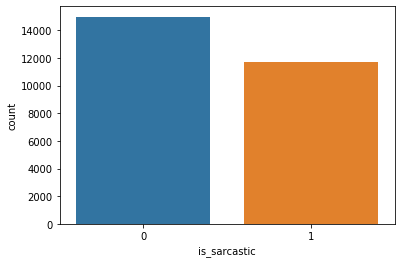

In [13]:
ax = sns.countplot(x='is_sarcastic',data=df)

In [ ]:
#There are 26709 records.
#Out of the total records, 14985 is non sarcastic.
#Out of the total records, 11724 is sarcastic.
#Though the distribution is slightly skewed with more number of non sarcastic records, we have a fair distribution of the sarcastic ones too.

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [16]:
df.drop(['article_link'],axis=1, inplace=True)

In [17]:
df.head(5)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [20]:
headline_text = df['headline']
headline_text

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
5                              advancing the world's women
6           the fascinating case for eating lab-grown meat
7        this ceo will send your kids to school, if you...
8        top snake handler leaves sinking huckabee camp...
9        friday's morning email: inside trump's presser...
10       airline passengers tackle man who rushes cockp...
11       facebook reportedly working on healthcare feat...
12       north korea praises trump and urges us voters ...
13       actually, cnn's jeffrey lord has been 'indefen...
14       barcelona holds huge protest in support of ref...
15       nuclear bomb detonates during rehearsal for 's...
16       cosby lawyer asks why accusers didn't come for.

In [21]:
phrase_len = headline_text.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))

max phrase len: 39


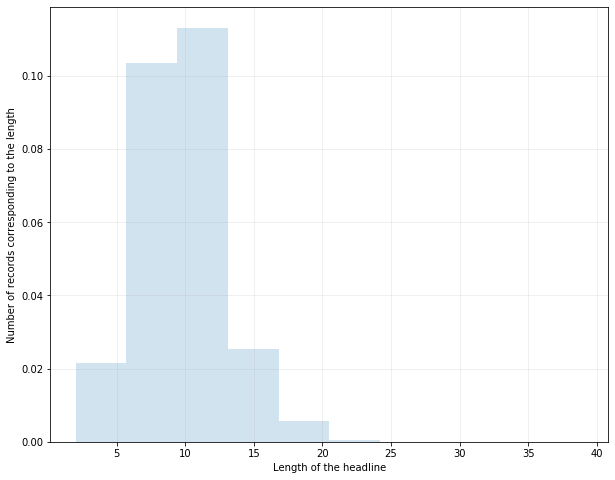

In [24]:
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('Length of the headline')
plt.ylabel('Number of records corresponding to the length')
plt.grid(alpha = 0.25)
#As we can see most of the headlines have there sentence length distributed between 5 and 15 words
#The maximum length is however 39.

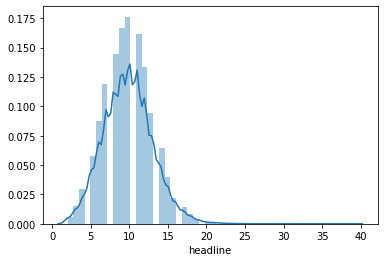

In [25]:
#Let us plot a histogram to visualize the same.
az = sns.distplot(phrase_len)
#Here also we confirm our observation that majority of the headlines have their length distributed between 5 to 15 words.
#We can observe thin line approaching 40 i.e 39 precisely being our max sentence length

#**## Modelling**

## Import required modules required for modelling.

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [27]:
max_features = 10000
maxlen = 40
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [28]:
t = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
t.fit_on_texts(df['headline'])

# Define X and y for your model.

In [30]:
X = t.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [31]:
t.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [32]:
len(t.word_index)

29656

#**## Word Embedding**

## Get Glove Word Embeddings

In [36]:
glove_file = project_path + "glove.6B.zip"

In [37]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [41]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE,encoding="utf8"):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



In [43]:
len(embeddings)

400000

# Create a weight matrix for words in training docs

In [47]:
num_words = len(t.word_index) + 1
embedding_matrix = np.zeros((num_words, 200))

for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [48]:
embedding_matrix.shape

(29657, 200)

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [0]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [58]:
vocab_size = len(t.word_index) + 1 # (num_words and vocab size are one and the same)
embedding_size =200
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, #Vocablury size
                                    200, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=maxlen) #Number of words in each headline
          )
model.add(Bidirectional(LSTM(128)))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))



In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 200)           5931400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                5140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 6,273,457
Trainable params: 342,057
Non-trainable params: 5,931,400
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2,  random_state=42)

In [55]:
X_train

array([[   0,    0,    0, ...,  760,   13,  868],
       [   0,    0,    0, ..., 5459,   82,   17],
       [   0,    0,    0, ...,  141,  244, 1422],
       ...,
       [   0,    0,    0, ...,  898,    8, 2606],
       [   0,    0,    0, ..., 2669,    2, 1539],
       [   0,    0,    0, ..., 1800,   19,    3]])

In [56]:
y_train

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [62]:
batch_size = 100
epochs = 5
history = model.fit(X_train,y_train,
          epochs=5,
          batch_size=100,          
          validation_data=(X_test, y_test))

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 83s 4ms/sample - loss: 0.1851 - accuracy: 0.9263 - val_loss: 0.3633 - val_accuracy: 0.8643
Epoch 2/5
21367/21367 [==============================] - 88s 4ms/sample - loss: 0.1469 - accuracy: 0.9445 - val_loss: 0.3626 - val_accuracy: 0.8639
Epoch 3/5
21367/21367 [==============================] - 89s 4ms/sample - loss: 0.1145 - accuracy: 0.9571 - val_loss: 0.3909 - val_accuracy: 0.8609
Epoch 4/5
21367/21367 [==============================] - 88s 4ms/sample - loss: 0.0874 - accuracy: 0.9674 - val_loss: 0.4127 - val_accuracy: 0.8677
Epoch 5/5
21367/21367 [==============================] - 88s 4ms/sample - loss: 0.0623 - accuracy: 0.9778 - val_loss: 0.4991 - val_accuracy: 0.8684


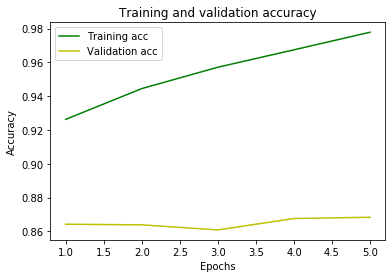

In [69]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = [1,2,3,4,5]
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
y_pred = model.predict(X_test)
y_pred_classes = model.predict_classes(X_test, verbose=0)
y_pred_classes = y_pred_classes[:, 0]


In [72]:
y_pred_classes = y_pred_classes.astype('int64')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2996
           1       0.87      0.83      0.85      2346

    accuracy                           0.87      5342
   macro avg       0.87      0.86      0.87      5342
weighted avg       0.87      0.87      0.87      5342



In [74]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, y_pred_classes))

[[2696  300]
 [ 403 1943]]


In [ ]:
#Thus our model has got good precision and recall value.
#It is to be noted that though the precision is same for both the classes..
#...the recall value for sarcastic comments is slightly less. This could be due to the shortage of data in this class.
#..We should note that the model has performed fairly well for just 5 epochs.
#If the model was trained for few more epochs the loss could be further reduced and recall value and overall accuracy could be 
#...improved for both the classes.